# Question 1

In [1]:
# deer initial population: 100

# growth rate 0.8 when density is low
# growth rate is 0 when the density is 3000 units

# herd population decreases at rate of 1.1 
# causes: vegetation burned out OR grazed flat
# when p = 0, d(n) = 0.9d(n-1)

# Food effect: 
# growth rate 0 when density is 0
# growth rate 1.5 when plant density is 3000 
# assumed to be linear in between

# eat as much as 1.2 density units/year when plant density is 3000
# amount each deer eats will decrease as plant density decreases

## Part 1

Questions:

1. how do we run the simulation if we do not know the initial population of the plants
2. did we go over growth rates that are not fixed?

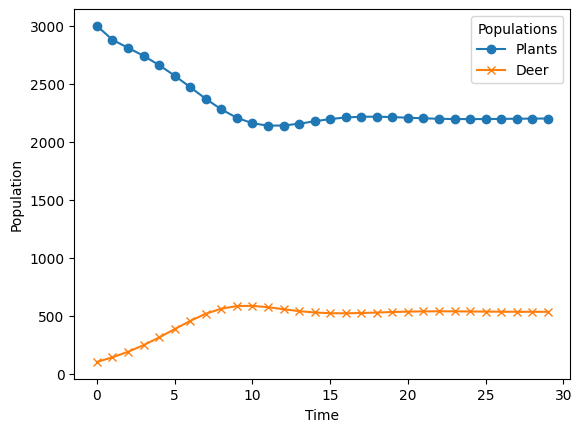

In [57]:
''' 
a) Discrete time steps of one year
'''


#%% Logistic growth of population x(n) = (1 + r)*x(n-1), where r = R*(1 - x(n-1)/K) 


# Import packages
import pandas as pd
import matplotlib.pyplot as plt


#%% Parameters
 
R = 0.8  # Intrinsic growth rate of plant population
K = 3000 # Carrying capacity of plant population
C = 0.0004 # Deer's efficiency


#%% Pre-loop

P0 = 3000 # Initial plant population
D0 = 100 # Initial deer population

N_generation = 30 # number of generations that we track

data = [] # initialize a empty list to store rows

row = {"Time" : 0, 
       "Plants" : P0, 
       "Deer" : D0}  

data.append(row) # Save the initial values


#%% Looping over years

D = D0 # Initialize Deer population (variable) by its initial value

P = P0 # Initialize Plant population (variable) by its initial value

for k in range(1,N_generation):
    
    # Plant Population
    P = (1 + R*(1 - P0 / K))*P0 - C*P0*D0 
    
    # Deer Population
    D = 0.0005*P0*D0 - 0.1*D0
    
    # Save current solution for next iteration
    P0, D0 = P, D
    
    # Save data 
    row = {"Time" : k, 
           "Plants" : P0,
           "Deer" : D0}    
    data.append(row)
    

## Aggregate the collected rows in a dataframe structure
df = pd.DataFrame(data)


#%% Plot


plt.plot(df["Time"], df["Plants"], marker = "o", label = "Plants")
plt.plot(df["Time"], df["Deer"], marker = "x", label = "Deer")
plt.xlabel("Time")
plt.ylabel("Population")

plt.legend(title = "Populations")



#%% Save results as csv file named "logistic.csv"

## uncomment below to save
# df.to_csv("logistic.csv")

## Part 2

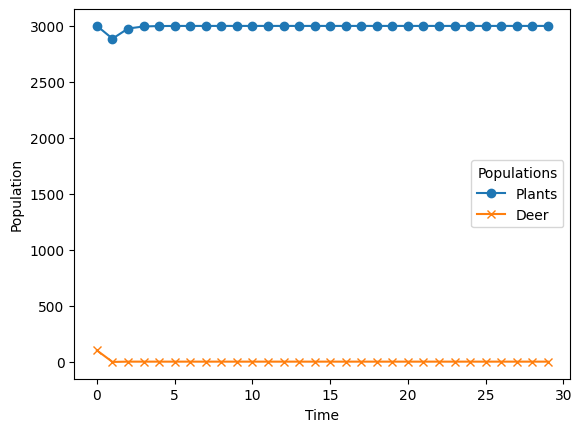

In [54]:
''' 
a) Discrete time steps of one year
'''


#%% Logistic growth of population x(n) = (1 + r)*x(n-1), where r = R*(1 - x(n-1)/K) 


# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import math


#%% Parameters
 
R = 0.8  # Intrinsic growth rate of plant population
K = 3000 # Carrying capacity of plant population
C = 0.0004 # Deer's efficiency


#%% Pre-loop

P0 = 3000 # Initial plant population
D0 = 100 # Initial deer population

N_generation = 30 # number of generations that we track

data = [] # initialize a empty list to store rows

row = {"Time" : 0, 
       "Plants" : P0, 
       "Deer" : D0}  

data.append(row) # Save the initial values


#%% Looping over years

D = D0 # Initialize Deer population (variable) by its initial value

P = P0 # Initialize Plant population (variable) by its initial value

for k in range(1,N_generation):
    
    # Plant Population
    P = (1 + R*(1 - P0 / K))*P0 - 1.2*D0*(1-math.exp(-0.001*P0)) 
    
    # Deer Population
    D = 1.5*D0*math.exp(-0.001*P0) - 0.1*D0
    
    # Save current solution for next iteration
    P0, D0 = P, D
    
    # Save data 
    row = {"Time" : k, 
           "Plants" : P0,
           "Deer" : D0}    
    data.append(row)
    

## Aggregate the collected rows in a dataframe structure
df = pd.DataFrame(data)


#%% Plot
plt.plot(df["Time"], df["Plants"], marker = "o", label = "Plants")
plt.plot(df["Time"], df["Deer"], marker = "x", label = "Deer")
plt.xlabel("Time")
plt.ylabel("Population")

plt.legend(title = "Populations")


#%% Save results as csv file named "logistic.csv"

## uncomment below to save
# df.to_csv("logistic.csv")

## Part 3

Overall, it makes more sense for the growth rate to be linear. While the exponential growth model shows that animals will eat less as plant concentration decreases, there was no information given that this factor should be considered. More closely to given information, a linear relationship demonstrates a more ecologically intuitive relationship where the deer population benefits from a densely populated environment. Furthermore, it is intuitive that the introduction of a predator would affect the carrying capacity of the plants in some way. The linear relatinship more clearly demonstrates this as the plants have a new carrying capacity of approximately 2200 plant density units.

# Question 2

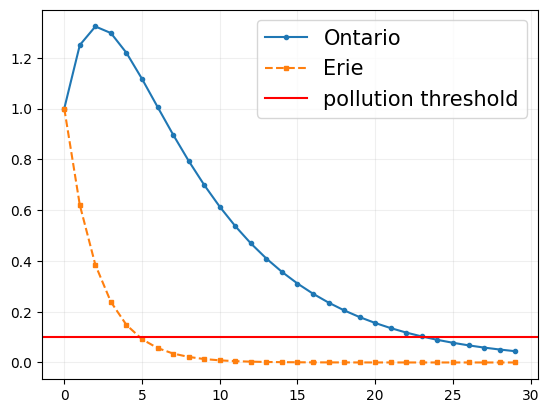

In [65]:
'''Recursive solution'''

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

a0 = 1 # Initial Lake Ontario Pollution
b0 = 1 # Initial Lake Erie Pollution

N_generation = 30 # number of years that we track

data = [] # initialize a empty list to store rows

row = {"Time" : 0, 
       "Lake Ontario" : a0, 
       "Lake Erie" : b0}  

data.append(row) # Save the initial values


#%% Looping over years

a = a0 # Initialize Lake Ontario pollution

b = b0 # Initialize Lake Eerie pollution

for k in range(1,N_generation):
    
    
    # Update Lake Ontario pollution 
    a = 0.87 * a0 + 0.38 * b0
    
    # Update Lake Erie pollution
    b = 0.62 * b0
    
    # Save current solution for next iteration
    a0 , b0 = a, b
    
    # Save data 
    row = {"Time" : k, 
           "Lake Ontario" : a, 
           "Lake Erie" : b}    
    data.append(row)
    

## Aggregate the collected rows in a dataframe structure
df = pd.DataFrame(data)


#%% Plot


plt.plot(df["Time"], df["Lake Ontario"], "-o", markersize=3, label="Ontario")
plt.plot(df["Time"], df["Lake Erie"], "--s", markersize=3, label="Erie")
plt.axhline(0.1, color  = "red", label = "pollution threshold")

# ax.set_yticks([0,K], ["0", "K=%s"%K])
plt.legend(fontsize=15)
plt.grid(visible=True, alpha=0.2)


#%% Save results as csv file named "logistic.csv"

## uncomment below to save
# df.to_csv("logistic.csv")